# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [6]:
df = pd.read_csv('garisKemiskinan_clustering.csv')
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,Cluster
0,0,0,2,2015.0,0,293697.0,1
1,0,0,2,2015.0,1,302128.0,1
2,0,0,2,2016.0,0,306243.0,1
3,0,0,2,2016.0,1,319768.0,1
4,0,0,0,2015.0,0,297479.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5256 non-null   int64  
 1   jenis     5256 non-null   int64  
 2   daerah    5256 non-null   int64  
 3   tahun     5256 non-null   float64
 4   periode   5256 non-null   int64  
 5   gk        5256 non-null   float64
 6   Cluster   5256 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 287.6 KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [10]:
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(4204, 6), y_train=(4204,)
Test set shape: X_test=(1052, 6), y_test=(1052,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [14]:
dt = DecisionTreeClassifier(max_depth=1, min_samples_split=20, min_samples_leaf=10, random_state=0).fit(X_train, y_train)
rf = RandomForestClassifier(max_depth=2, n_estimators=25, random_state=0).fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Decision Tree Classifier: Membangun pohon keputusan dengan kedalaman terbatas (max_depth=1), memastikan pembelahan hanya terjadi jika ada minimal 20 sampel untuk split dan minimal 10 sampel di setiap daun untuk menghindari overfitting.

Random Forest Classifier: Menggunakan 25 pohon keputusan (n_estimators=25) dengan kedalaman terbatas (max_depth=2), yang menggabungkan prediksi dari banyak pohon untuk meningkatkan akurasi dan mengurangi overfitting.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [19]:
model_results = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
}

models = [dt, rf]
for model in models:
    y_pred = model.predict(X_test)

    model_results['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    model_results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    model_results['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

    cm = confusion_matrix(y_test, y_pred)

df_metrics = pd.DataFrame(model_results)
df_metrics

C:\Users\Auric\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.692015,0.529281,0.692015,0.58554
1,Random Forest,1.000000,1.000000,1.000000,1.00000


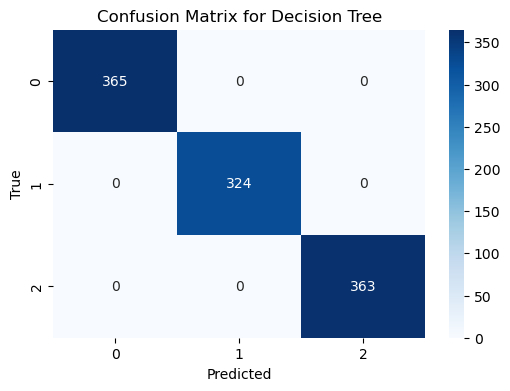

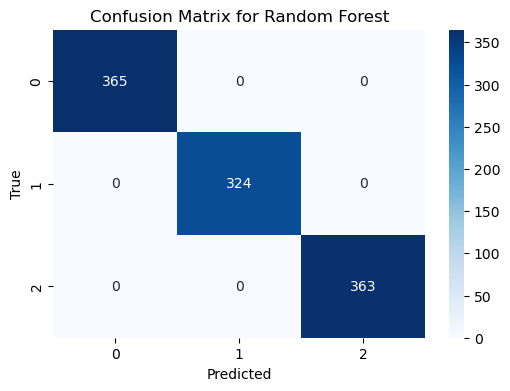

In [20]:
for i, model in enumerate(models):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {model_results['Model'][i]}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Melakukan hasil uji pertama, model Random Forest menunjukkan kinerja yang sangat baik dengan nilai akurasi 100%, 
sedangkan model Decision Tree memiliki performa yang lebih rendah, dengan hasil yang kurang memuaskan di semua metrik evaluasi dengan alias underfitting.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [24]:
param_dist_dt = {
    'max_depth': [1, 3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param_dist_dt, n_iter=10, cv=5, random_state=42, scoring='accuracy')
random_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", random_search_dt.best_score_)

best_dt_random = random_search_dt.best_estimator_
dt_test_score_random = best_dt_random.score(X_test, y_test)
print("Test set score for Decision Tree (RandomizedSearch):", dt_test_score_random)


Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': None}
Best cross-validation score for Decision Tree: 1.0
Test set score for Decision Tree (RandomizedSearch): 1.0


In [25]:
param_dist_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0), param_dist_rf, n_iter=10, cv=5, random_state=42, scoring='accuracy')
random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", random_search_rf.best_score_)

best_rf_random = random_search_rf.best_estimator_
rf_test_score_random = best_rf_random.score(X_test, y_test)
print("Test set score for Random Forest (RandomizedSearch):", rf_test_score_random)

Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': None}
Best cross-validation score for Random Forest: 1.0
Test set score for Random Forest (RandomizedSearch): 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [28]:
# Hasil evaluasi untuk Decision Tree dan Random Forest setelah tuning
y_pred_dt = best_dt_random.predict(X_test)
y_pred_rf = best_rf_random.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

model_results = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf],
    'Precision': [precision_dt, precision_rf],
    'Recall': [recall_dt, recall_rf],
    'F1-Score': [f1_dt, f1_rf]
}

df_metrics = pd.DataFrame(model_results)
df_metrics

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).

jawab:
Sebelum dilakukan tuning, model Random Forest menunjukkan kinerja yang sangat baik dengan nilai akurasi 100%, sedangkan model Decision Tree memiliki performa yang lebih rendah, dengan hasil yang kurang memuaskan di semua metrik evaluasi.

Setelah tuning, kedua model menunjukkan hasil yang luar biasa, dengan nilai 1 di seluruh metrik evaluasi. Namun, hal ini dapat mengindikasikan potensi overfitting, karena meskipun performa di data pelatihan sangat baik, model mungkin tidak akan mampu beradaptasi dengan data baru secara optimal.

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?

jawab:
Setelah proses tuning, meskipun kedua model (Decision Tree dan Random Forest) menunjukkan hasil yang sempurna di semua metrik evaluasi, hal ini berpotensi mengindikasikan adanya overfitting. Model-model tersebut kemungkinan terlalu disesuaikan dengan data pelatihan dan tidak akan bekerja secara efektif pada data yang belum pernah dilihat sebelumnya.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

jawab: Salah satu langkah yang bisa diambil adalah dengan mengumpulkan lebih banyak data yang beragam untuk membantu model dalam melakukan generalisasi yang lebih baik. Selain itu, mencoba lebih lanjut dalam melakukan tuning pada hyperparameter atau mempertimbangkan penggunaan algoritma lain, seperti Support Vector Machine (SVM) atau Gradient Boosting, dapat memberikan hasil yang lebih konsisten dan stabil.


In [33]:
# Memeriksa dataset
print(df.head())

# Misalnya, kamu bisa memisahkan fitur dan label untuk klasifikasi
X = df.drop(columns=['Cluster'])  # Fitur
y = df['Cluster']  # Label cluster sebagai target


   provinsi  jenis  daerah   tahun  periode        gk  Cluster
0         0      0       2  2015.0        0  293697.0        1
1         0      0       2  2015.0        1  302128.0        1
2         0      0       2  2016.0        0  306243.0        1
3         0      0       2  2016.0        1  319768.0        1
4         0      0       0  2015.0        0  297479.0        1
